### <p style="text-align: right;"> &#9989; Jacob Jensen

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

# Day 22 In-Class Assignment:  Fourier Transform
<img src="http://groups.csail.mit.edu/netmit/wordpress/wp-content/themes/netmit/images/sFFT.png" width=500px><a href="http://groups.csail.mit.edu/netmit/wordpress/projects/sparse-fourier-transform/"><p style="text-align: right;">
Image from http://groups.csail.mit.edu/netmit
</p></a>


1. **Scientific motivation** 
    - Weather and climate change
2. **Modeling tools** 
    - Fast Fourier Transform
3. **Programming concepts** 
    - Code Review
    - Web scraping
4. **Python Programming Concepts** 
    - Numpy

### Agenda for today's class (110 minutes)

</p>

1. Review of pre-class assignment
1. Live Demo of an FFT
1. FFT analysis of Temperature Data

---
# 1. Review of pre-class assignment

Questions from the pre-class? What can you learn by applying a Fourier Transform to a time series dataset?

----
# 1.2. Live Demo of an FFT

As a class we will do an audio demo of the Fast Fourier Transform. 

-----
# 2. NOAA Temperature Example
We will be using some of the extensive datasets available at the National Oceanic and Atmospheric Administration (NOAA). 

<a href="http://www.noaa.gov/"><img width=100 align='right' src="http://www.nssl.noaa.gov/projects/debrisflow09/NOAA%20Circle.gif"></a>

### Step 1: Find and download data
We are going to use a web scraper written to download data from the NOAA website:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

from noaa_scraper import get_noaa_temperatures

&#9989; Do This - With your group, do a code review of the contents of the **noaa_scraper.py** file and answer the following questions.

**Question:** In your own words, describe what the HTMLParser class does. 

<font size=8 color="#009600">&#9998;</font> It takes intformation in the HTML format and converts it into a text format

**Question:** How did you find the answer to the above quesiton? 

<font size=8 color="#009600">&#9998;</font> Looked into the noaa_scraper file, knew some basic information on the function of a parser, and google.

**Question:** Describe in your own words what the does the following command do?

FloatProgress(value=0.0)

FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2007/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2008/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2009/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2010/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2011/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2012/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS01

FloatProgress(value=0.0, max=13.0)

reading... .\data\CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2013-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2014-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2015-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2016-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2017-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2018-MI_Gaylord_9_SSW.txt
reading... .\data\CRNS0101-05-2019-MI_Gaylord_9_SSW.txt


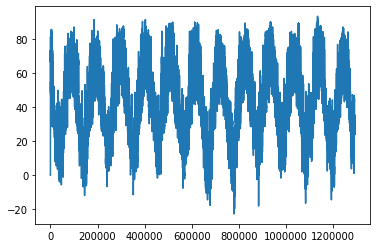

In [19]:
air_temperatures = get_noaa_temperatures('http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/', 'Gaylord', 200)
plt.plot(air_temperatures)

<font size=8 color="#009600">&#9998;</font> Goes to the link, finds the pages with the word 'Gaylord', and gives up after 100 pages.

**Question:** What is the time period over which the data was sampled?

<font size=8 color="#009600">&#9998;</font> Over the 2019 year

**Question:** What is the sampling rate (how often) the data taken? 

<font size=8 color="#009600">&#9998;</font> Every 5 minutes

**Question:**  Describe the the periodic nature of the signal. Is there more than one period in the data? Can you think of natural factors that would cause this periodicity? 

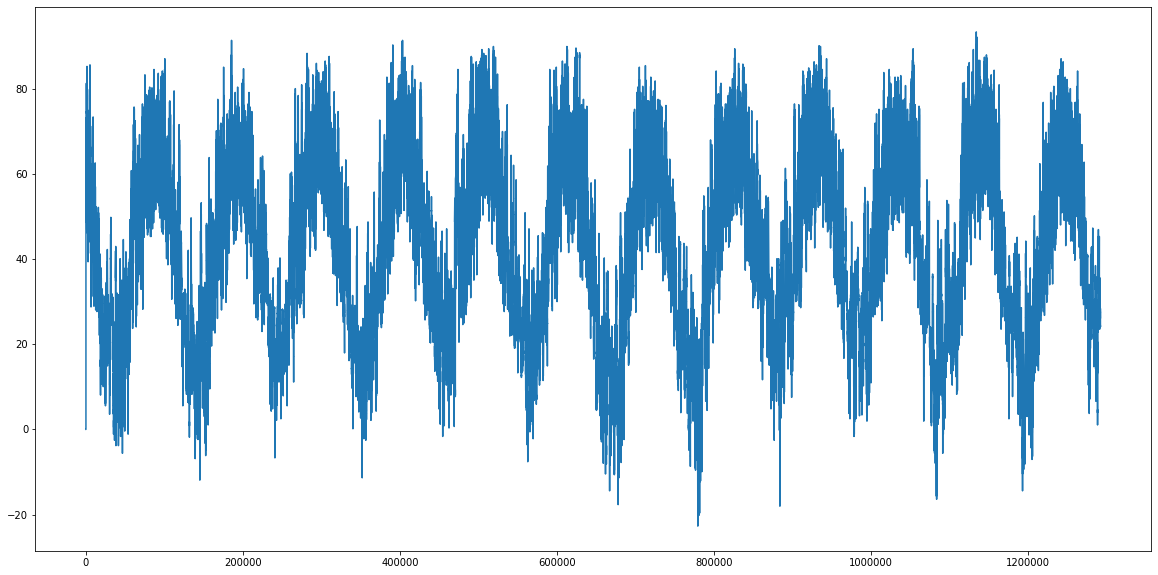

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(air_temperatures)

<font size=8 color="#009600">&#9998;</font> It looks like there is an underlying period in the overall sin wave of the data. The time of day may contribute to this.

**Question:**  The get_noaa_temperature function uses a progress bar to indicate how long it is taking to download the files. What class is being used to generate the this display? 

<font size=8 color="#009600">&#9998;</font> The noaa_spider class

### Step 2: Calculate FFT

&#9989; **DO THIS** - Using the same code as the pre-class assignment. Calculate the Fast Fourier Transform and display the frequency domain. Remember that the frequency domain is symmetric so go ahead and just display the first half and ignore the complex component. 


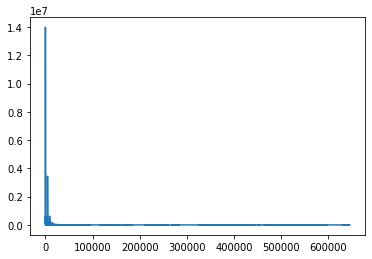

In [126]:
# DO THIS: Erase the contents of this cell and put your answer here.
import numpy as np
Fs = np.fft.fft(air_temperatures)
plt.plot(abs(Fs[1:int(len(Fs)/2)]))
plt.show()

**Question:**  As a group, discuss the above graph. Is it what you expected?  Can you tell where the largest frequencies contributing to the signal?   

<font size=8 color="#009600">&#9998;</font> We can tell one is well above 4000 and the other is around 12

### Step 3: Calculate largest frequencies

&#9989; **DO THIS:** Write some code to determine the frequencies of the six largest values in the first half of the Fourier transform.  

In [139]:
# DO THIS: Erase the contents of this cell and put your code here.
# Use additional cells as needed to logically split up your work
FsCopy = Fs.copy()
highFs = []
for i in range(6):
    maxFreq = np.where(FsCopy == FsCopy.max())
    FsCopy[maxFreq] = 0
    highFs.append(int(list(maxFreq)[0]))
    
highFs.sort()
highFs

TypeError: only size-1 arrays can be converted to Python scalars

If done correctly, the above answer should have numbers around 10-13 and a much bigger number over 3000.  These numbers represent frequencies of periodic events that occur over the entire time period for which the data was collected.  For example if the "frequency" is 10 this means something happened 10 times during the data collection period. 

**Question:** Why is there a spike around 10-13 in this data? What happened 10-13 times?

<font size=8 color="#009600">&#9998;</font> The month changed about 10-13 times. 

**Question:** Why is there a spike of over 3000 in this data? What happened over 3000 times?

<font size=8 color="#009600">&#9998;</font> Data was collected over 3000 times.

### Step 4: Clean the data

**Question:** Modify the frequency space to remove the smallest frequencies that impact the signal (i.e. lets remove the noise in the data.  Try zeroing out the all but the 10 biggest contributions. 

HINT: You don't need to write loops (although you can). Remember you can assign a group of indexes a particular value in a numpy array. See the following example:


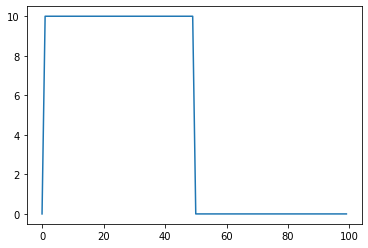

In [128]:
#Example numpy range assignment
example = np.zeros(100)
example[1:50] = 10
plt.plot(example)

In [137]:
# DO THIS: Erase the contents of this cell and put your code here.
Fs[highFs[0]+1:highFs[1]] = 0
Fs[highFs[1]+1:highFs[2]] = 0
Fs[highFs[2]+1:highFs[3]] = 0
Fs[highFs[3]+1:highFs[4]] = 0
Fs[highFs[4]+1:highFs[5]] = 0

&#9989; **DO THIS**: Do an "inverse Fourier Transform" to the cleaned up data.  Plot the resulting data in the time domain.

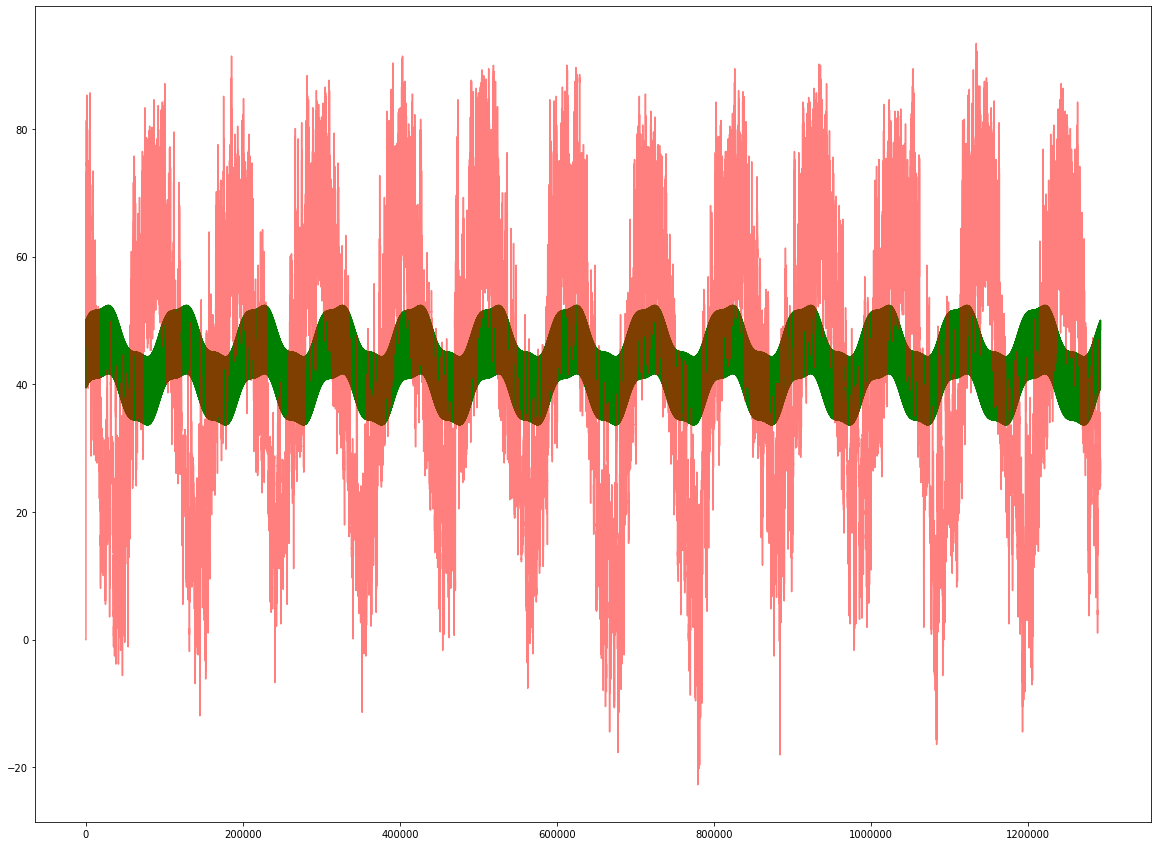

In [138]:
# DO THIS: Erase the contents of this cell and put your code here.
newY = np.fft.ifft(Fs)
plt.figure(figsize = (20, 15))
plt.plot(newY, color = 'green')
plt.plot(air_temperatures, color = 'red', alpha = 0.5)
plt.show()

**Question:** Describe in your own words how frequency limited data compare to the original data? 

<font size=8 color="#009600">&#9998;</font> It's a lot smoother and less noisy but isn't as peaky.

----

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees